# Digit Recognizer Using Multi-Layer Perceptron (MLP)

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero). - by kaggle.com

In [4]:
# importing python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [6]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

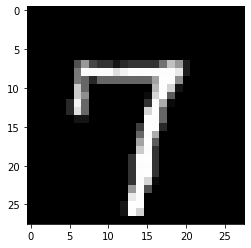

In [7]:
# view the image
single_image = X[6].reshape(28,28)
plt.imshow(single_image, cmap='gray')
plt.show()

In [9]:
# scaling the values to a range 0 to 1
X = X.astype('float32') / 255.0 

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

# importing TensorFlow and tf.keras libraries
import tensorflow as tf
from tensorflow import keras

In [19]:
# Building the neural network (MLP) requires configuring the layers of the model, then compiling the model.
model = keras.Sequential([
    keras.layers.Dense(256, kernel_initializer='uniform', activation='relu'),
    keras.layers.Dropout(0.45),
    keras.layers.Dense(256, kernel_initializer='uniform', activation='relu'),
    keras.layers.Dropout(0.45),
    keras.layers.Dense(256, kernel_initializer='uniform', activation='relu'),
    keras.layers.Dropout(0.45),
    keras.layers.Dense(10, kernel_initializer='uniform', activation='softmax')
])

In [21]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# train the model
model.fit(X_train, y_train, batch_size=128, epochs=20)

Train on 37800 samples
Epoch 1/20
37800/37800 [==============================] - 2s 46us/sample - loss: 0.6103 - accuracy: 0.8019
Epoch 2/20
37800/37800 [==============================] - 1s 34us/sample - loss: 0.2370 - accuracy: 0.9296
Epoch 3/20
37800/37800 [==============================] - 1s 34us/sample - loss: 0.1836 - accuracy: 0.9451
Epoch 4/20
37800/37800 [==============================] - 1s 34us/sample - loss: 0.1567 - accuracy: 0.9527
Epoch 5/20
37800/37800 [==============================] - 1s 34us/sample - loss: 0.1342 - accuracy: 0.9598
Epoch 6/20
37800/37800 [==============================] - 1s 34us/sample - loss: 0.1237 - accuracy: 0.9620
Epoch 7/20
37800/37800 [==============================] - 1s 34us/sample - loss: 0.1089 - accuracy: 0.9674
Epoch 8/20
37800/37800 [==============================] - 1s 35us/sample - loss: 0.1036 - accuracy: 0.9689
Epoch 9/20
37800/37800 [==============================] - 1s 36us/sample - loss: 0.1003 - accuracy: 0.9693
Epoch 10/20
37

In [23]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('\nTest accuracy:', test_acc)

4200/1 - 0s - loss: 0.2975 - accuracy: 0.9748

Test accuracy: 0.9747619


## Below lines are for kaggle competition submission
This is to generate the submission csv file based on the given test data without the true/target label.

In [13]:
# test dataset
X_test = test.iloc[:, :].values

In [15]:
# scaling the values to a range 0 to 1
X_test = X_test.astype('float32') / 255.0

In [16]:
# make predictions
predictions = model.predict(X_test)

In [17]:
predictions_array = np.zeros((28000,1))
for i in range(28000):
    predictions_array[i] = np.argmax(predictions[i])

predictions_array = predictions_array.astype(int).ravel()

In [18]:
#import sample submission template
template = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [19]:
data = {'ImageId': template.ImageId, 'Label': predictions_array}
output = pd.DataFrame(data)
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
